In [1]:
import sys
import os
import yaml
import numpy as np
import pandas
import pathlib
import time
from datetime import date
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
from matplotlib.ticker import MaxNLocator
import matplotlib as mpl
import cmocean as cm
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import xarray
from matplotlib.offsetbox import AnchoredText

In [12]:
input_dir = pathlib.Path('/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/data')
graphics_dir = pathlib.Path('/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/graphics/Maps/')

In [3]:
stat={}
for stat_type in ['median','min','max','std']:
    print(stat_type)
    stat[stat_type]={}
    stat[stat_type]['2014'] = pandas.read_excel(
        input_dir/'2014_stats.xlsx', sheet_name=f'2014 {stat_type}')
    stat[stat_type]['ref'] = pandas.read_excel(
        input_dir/'Reference_stats.xlsx', sheet_name=f'ref {stat_type}')
    stat[stat_type]['%change'] = pandas.read_excel(
        input_dir/'2014_reference_percentChange_stats.xlsx', sheet_name=f'%change {stat_type}')
    

median
min
max
std


In [4]:
stat['min']['%change'].max()

NO3        -0.000298
NH4        -0.000235
salinity    0.000000
temp        0.000000
DOXG        2.045954
dtype: float64

In [5]:
shp='/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/SalishSeaModel-grid/shapefiles/SSMGrid2_tce_ecy_node_info_v2_10102022/SSMGrid2_tce_ecy_node_info_v2_10102022.shp'
gdf = gpd.read_file(shp)
gdf.shape

(16012, 24)

In [6]:
case=[
    '2014',
    'ref',
    '%change'
]

model_var=['NO3','DOXG','salinity','temp']
for var in model_var:
    for stat_type in ['median','std','min','max']:
        for idx in [0,1,2]:
            if var=='salinity':5,
                gdf[f'{case[idx]}_SSS_{stat_type}']=stat[stat_type][case[idx]][var]    
            elif var=='temp':
                gdf[f'{case[idx]}_SST_{stat_type}']=stat[stat_type][case[idx]][var]
            else:
                gdf[f'{case[idx]}_{var}_{stat_type}']=stat[stat_type][case[idx]][var]
            

# Save stats to shapefile

In [7]:
#gdf.to_file('/mmfs1/gscratch/ssmc/USRS/PSI/Rachael/projects/KingCounty/SalishSeaModel-grid/shapefiles/SSMGrid2_tce_ecy_node_info_v2_10102022/SSMGrid2_tce_ecy_node_info_v2_10102022_withStats.shp')

# Plot results

In [75]:
# create dictionary of color schemes
# LENGTH COLORS MUST EQUAL LENGTH OF UPPER_BOUNDS

colors = {
    'DOXG_2014': ['red','orange','navajowhite','beige','skyblue','royalblue','midnightblue'],
    'DOXG_ref': ['red','orange','navajowhite','beige','skyblue','royalblue','midnightblue'],
    'DOXG_%change': ['red','orange','navajowhite','beige','beige','skyblue','royalblue','midnightblue'],
    'SSS_2014': ['navy','mediumblue','cadetblue','seagreen','lightseagreen','khaki','lemonchiffon'],
    'SST_2014': ['midnightblue','darkslateblue','darkmagenta','darkorchid','palevioletred','thistle','palegoldenrod','khaki','gold','goldenrod']
}

# these are the upper bounds for the value ranges that pair with the above colors
upper_bounds={
    'DOXG_2014': [2, 3, 4, 5, 6, 7, np.ceil(stat['median']['ref']['DOXG'].max())],
    'DOXG_ref': [2, 3, 4, 5, 6, 7, np.ceil(stat['median']['ref']['DOXG'].max())],
    'DOXG_%change': [-10, -5, -1, 0, 1, 5, 10, 100],
    'SSS_2014':[5, 10, 15, 20, 25, 30, 35],
    'SST_2014':[4,6,8,9,10,11,12,16,20,24],
    'NO3':[0.2, 0.4, 0.6, 0.8, 1, 2, np.ceil(stat['max']['ref']['NO3'].max())]
    
}

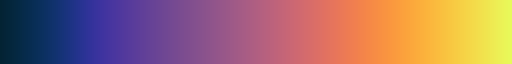

In [57]:
cmap = cm.cm.thermal
cmap

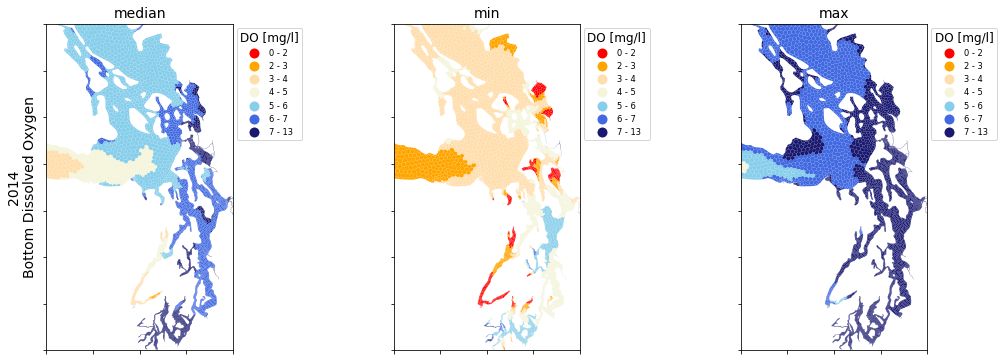

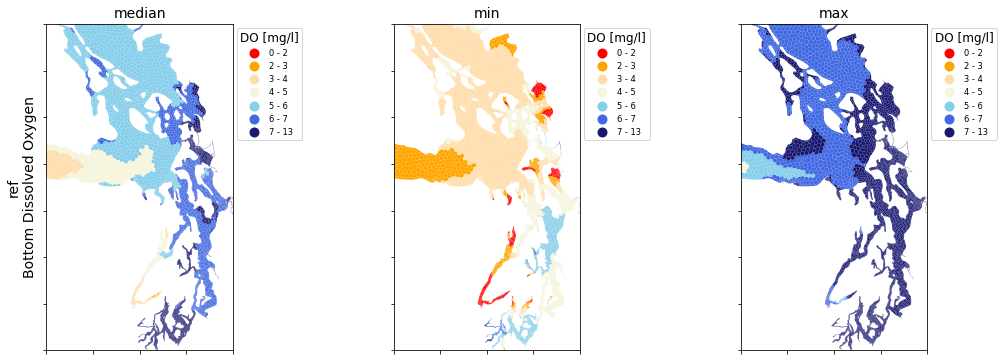

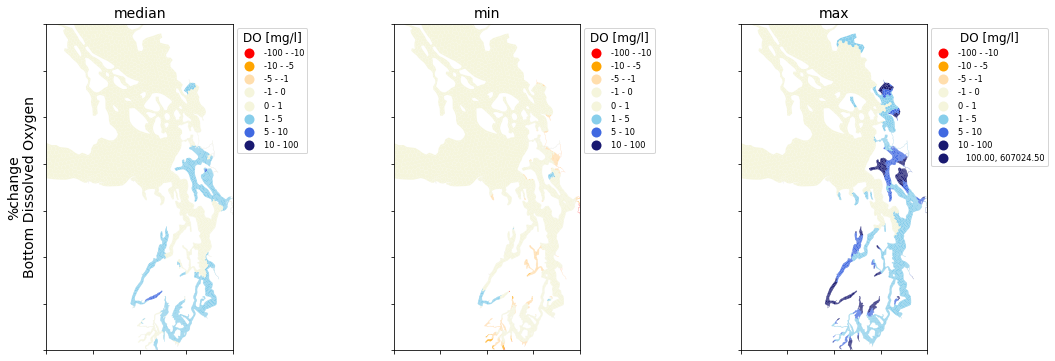

In [27]:
cax={}
stat_type = ['median','min','max']
model_var='DOXG'
case = '2014'
vmin=[0,4,5,6]
vmax=[0.6,10,32,10]
   
var="DOXG"
for case in ['2014','ref','%change']:
    if case == '%change':
        
        #upper_bounds=[-100,-10,-1,0,1,10,100]
        
        fig, axs = plt.subplots(
        1,3, figsize = (16,6),
           gridspec_kw={
           'width_ratios': [1,1,1],
           'height_ratios': [1],
       'wspace': .75,
       'hspace': 0})

        for idx,plot_stat in enumerate(stat_type):
            bounds=[]
            if plot_stat=='std':
                gdf.plot(
                    ax=axs[idx],
                    column=f'{case}_{var}_{plot_stat}',
                    legend=True, 
                )
            else:     
                gdf.plot(
                    ax=axs[idx],
                    column=f'{case}_{var}_{plot_stat}',
                    scheme="User_Defined", 
                    legend=True, 
                    classification_kwds=dict(bins=upper_bounds[f'{model_var}_{case}']),
                    cmap=mpl.colors.ListedColormap(colors[f'{model_var}_{case}'])
                )
                axs[idx].set_title(f'{plot_stat}', fontsize=14)
                axs[idx].set_ylim(5.95e6, 6.3e6)
                axs[idx].set_xlim(-1.38e7, -1.36e7)
                axs[idx].set_xticklabels('')
                axs[idx].set_yticklabels('')
                legend = axs[idx].get_legend()

                legend._loc = 2 
                legend.set_bbox_to_anchor([1,1])
                legend.set_title('DO [mg/l]')

                # # get all the legend labels
                # legend_labels = axs.get_legend().get_texts()
                for index, upper_bound in enumerate(upper_bounds[f'{model_var}_{case}']):
                    if index==0:
                        lower_bound = -100
                    else:
                        lower_bound = upper_bounds[f'{model_var}_{case}'][index-1]

                    # format the numerical legend here
                    bound = f'{lower_bound:.0f} - {upper_bound:.0f}'
                    bounds.append(bound)
                # get all the legend labels
                legend_labels = axs[idx].get_legend().get_texts()

            # replace the legend labels
            for bound, legend_label in zip(bounds, legend_labels):
                legend_label.set_text(bound)
            del bounds
    else: 
        
        #upper_bounds=[2,3,4,5,6,7,np.ceil(stat['median']['ref']['DOXG'].max())] # !!! Don't modify         
        fig, axs = plt.subplots(
            1,3, figsize = (16,6),
               gridspec_kw={
               'width_ratios': [1,1,1],
               'height_ratios': [1],
           'wspace': .75,
           'hspace': 0})

        for idx,plot_stat in enumerate(stat_type):
            bounds=[]
            if plot_stat=='std':
                gdf.plot(
                    ax=axs[idx],
                    column=f'{case}_{var}_{plot_stat}',
                    legend=True, 
                )
            else:     
                gdf.plot(
                    ax=axs[idx],
                    column=f'{case}_{var}_{plot_stat}',
                    scheme="User_Defined", 
                    legend=True, 
                    classification_kwds=dict(bins=[2,3,4,5,6,7]),
                    cmap=mpl.colors.ListedColormap(colors[f'{model_var}_{case}'])
                )
                axs[idx].set_title(f'{plot_stat}', fontsize=14)
                axs[idx].set_ylim(5.95e6, 6.3e6)
                axs[idx].set_xlim(-1.38e7, -1.36e7)
                axs[idx].set_xticklabels('')
                axs[idx].set_yticklabels('')
                legend = axs[idx].get_legend()

                legend._loc = 2 
                legend.set_bbox_to_anchor([1,1])
                legend.set_title('DO [mg/l]')

                # # get all the legend labels
                # legend_labels = axs.get_legend().get_texts()
                for index, upper_bound in enumerate(upper_bounds[f'{model_var}_{case}']):
                    if index == 0:
                        lower_bound = 0
                    else:
                        lower_bound = upper_bounds[f'{model_var}_{case}'][index-1]

                    # format the numerical legend here
                    bound = f'{lower_bound:.0f} - {upper_bound:.0f}'
                    bounds.append(bound)
                # get all the legend labels
                legend_labels = axs[idx].get_legend().get_texts()

            # replace the legend labels
            for bound, legend_label in zip(bounds, legend_labels):
                legend_label.set_text(bound)
            del bounds
    axs[0].set_ylabel(f'{case}\nBottom Dissolved Oxygen', fontsize=14)
    
    plt.savefig(graphics_dir/f'{case}_DO_stats.png', bbox_inches='tight', format='png')

In [55]:
gdf['2014_SST_median'].median()

10.68849992752075

In [66]:
gdf['2014_SST_max'].max()

25.28709983825684

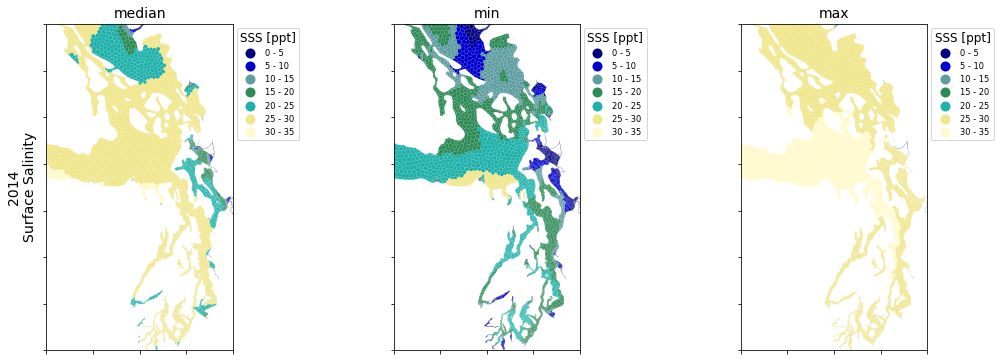

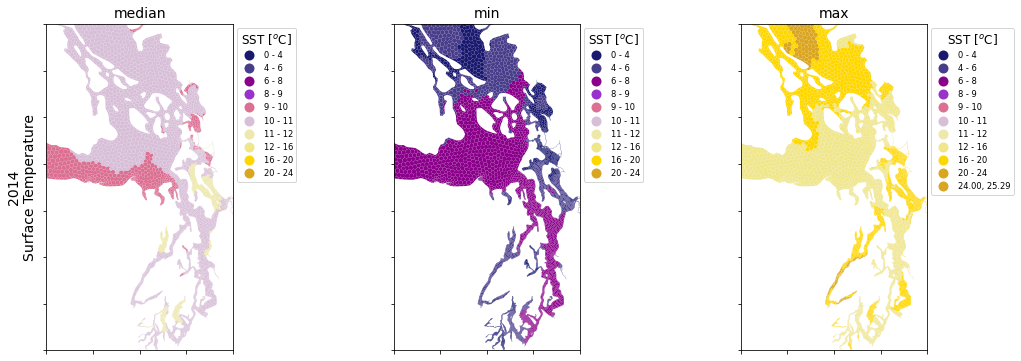

In [76]:
cax={}
stat_type = ['median','min','max']
var='SSS'
case = '2014'
vmin=[0,4,5,6]
vmax=[0.6,10,32,10]

for var in ['SSS','SST']:
    fig, axs = plt.subplots(
        1,3, figsize = (16,6),
           gridspec_kw={
           'width_ratios': [1,1,1],
           'height_ratios': [1],
       'wspace': .75,
       'hspace': 0})

    for idx,plot_stat in enumerate(stat_type):
        bounds=[]
        if plot_stat=='std':
            gdf.plot(
                ax=axs[idx],
                column=f'{case}_{var}_{plot_stat}',
                legend=True, 
            )
        else:   
            gdf.plot(
                ax=axs[idx],
                column=f'{case}_{var}_{plot_stat}',
                scheme="User_Defined", 
                legend=True, 
                classification_kwds=dict(bins=upper_bounds[f'{var}_{case}']),
                cmap=mpl.colors.ListedColormap(colors[f'{var}_{case}'])
            )

            axs[idx].set_title(f'{plot_stat}', fontsize=14)
            axs[idx].set_ylim(5.95e6, 6.3e6)
            axs[idx].set_xlim(-1.38e7, -1.36e7)
            axs[idx].set_xticklabels('')
            axs[idx].set_yticklabels('')
            legend = axs[idx].get_legend()

            legend._loc = 2 
            legend.set_bbox_to_anchor([1,1])
            if var=='SSS':
                legend.set_title(f'{var} [ppt]')
            else:
                legend.set_title(f'{var} [$^o$C]')

            # # get all the legend labels
            # legend_labels = axs.get_legend().get_texts()
            for index, upper_bound in enumerate(upper_bounds[f'{var}_{case}']):
                if index == 0:
                    lower_bound = 0
                else:
                    lower_bound = upper_bounds[f'{var}_{case}'][index-1]

                # format the numerical legend here
                bound = f'{lower_bound:.0f} - {upper_bound:.0f}'
                bounds.append(bound)
            # get all the legend labels
            legend_labels = axs[idx].get_legend().get_texts()

        # replace the legend labels
        for bound, legend_label in zip(bounds, legend_labels):
            legend_label.set_text(bound)
        del bounds
    if var=='SSS':
        axs[0].set_ylabel(f'{case}\nSurface Salinity', fontsize=14)
    else:
        axs[0].set_ylabel(f'{case}\nSurface Temperature', fontsize=14)


    plt.savefig(graphics_dir/f'{case}_{var}_stats.png', bbox_inches='tight', format='png')

Text(135.0, 0.5, 'Surface Nitrate')

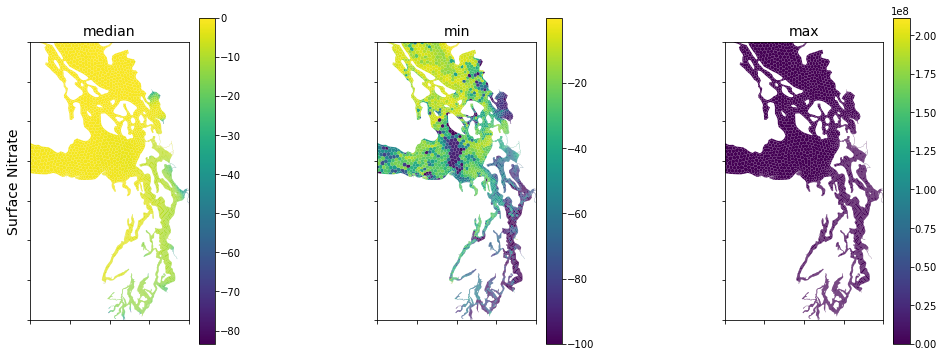

In [10]:
var="NO3"
stat_type = ['median','min','max']
bounds=[]
#upper_bounds=[0.2, 0.4, 0.6, 0.8, 1, 2, np.ceil(stat['max']['ref'][var].max())]

fig3, axs = plt.subplots(
    1,3, figsize = (16,6),
       gridspec_kw={
       'width_ratios': [1,1,1],
       'height_ratios': [1],
   'wspace': .75,
   'hspace': 0})

for idx,plot_stat in enumerate(stat_type): 
    bounds=[]
    gdf.plot(
        ax=axs[idx],
        column=f'{case}_{var}_{plot_stat}',
        # scheme="User_Defined", 
        legend=True, 
        # classification_kwds=dict(bins=upper_bounds),
        # cmap=mpl.colors.ListedColormap(
        #     ['midnightblue','royalblue','skyblue','beige','navajowhite','orange','red'])
    )
    axs[idx].set_title(f'{plot_stat}', fontsize=14)
    axs[idx].set_ylim(5.95e6, 6.3e6)
    axs[idx].set_xlim(-1.38e7, -1.36e7)
    axs[idx].set_xticklabels('')
    axs[idx].set_yticklabels('')
    legend = axs[idx].get_legend()

    # legend._loc = 2 
    # legend.set_bbox_to_anchor([1,1])
    # legend.set_title('NO$_3$ [mg/l]')

#     # # get all the legend labels
#     # legend_labels = axs.get_legend().get_texts()
#     for index, upper_bound in enumerate(upper_bounds):
#         if index == 0:
#             lower_bound = 0
#         else:
#             lower_bound = upper_bounds[index-1]

#         # format the numerical legend here
#         bound = f'{lower_bound:.0f} - {upper_bound:.0f}'
#         bounds.append(bound)
#     # get all the legend labels
#     legend_labels = axs[idx].get_legend().get_texts()

#     # replace the legend labels
#     for bound, legend_label in zip(bounds, legend_labels):
#         legend_label.set_text(bound)
#     del bounds
axs[0].set_ylabel('Surface Nitrate', fontsize=14)

In [ ]:
case

In [ ]:
cax={}
stat = ['median','min','max','std']
model_var=['NO3','DOXG','SSS','SST']
case = '2014'
stat_type = stat[0]
# Median: NO3, DO, SSS, SST
vmin=[0,4,5,6]
vmax=[0.6,10,32,10]

fig, axs = plt.subplots(
    4,2, figsize = (8,6),
       gridspec_kw={
       'width_ratios': [1,1],
       'height_ratios': [1,1,1,1],
   'wspace': 0.5,
   'hspace': 0})
for idx,var in enumerate(model_var):
    # # create `cax` for the colorbar
    # divider = make_axes_locatable(axs[idx])
    # cax[idx] = divider.append_axes("right", size="5%", pad=0.1)
    # BASE 
    # median
    if var=="DOXG":
        gdf.plot(ax=axs[idx],
            column=f'{case}_{var}_{stat_type}',
            scheme="User_Defined", 
            legend=True, 
            classification_kwds=dict(bins=[2,3,4,5,6,7]),
            cmap=mpl.colors.ListedColormap(
                ['red','orange','navajowhite','beige','skyblue','royalblue','midnightblue'])
        )
    else:
        gdf.plot(
                f'{case}_{var}_{stat_type}', 
                ax=axs[idx], 
                cax=cax[idx], 
                vmin=vmin[idx],
                vmax=vmax[idx],
                legend=True)

    
    axs[idx].set_title(f'{var}', fontsize=14)
    axs[idx].set_ylim(5.95e6, 6.3e6)
    axs[idx].set_xlim(-1.38e7, -1.36e7)
    axs[idx].set_xticklabels('')
    axs[idx].set_yticklabels('')

In [ ]:
fig, axs = plt.subplots(
    1,1, figsize = (8,6),
       gridspec_kw={
       'width_ratios': [1],
       'height_ratios': [1],
   'wspace': 0.5,
   'hspace': 0})
gdf.plot(f'{case}_{var}_{stat_type}', ax=axs, legend=True)
axs.set_ylim(5.95e6,6.3e6)
axs.set_xlim(-1.38e7,-1.36e7)
axs.set_xticklabels('')
axs.set_yticklabels('')
axs.set_title('NO3',fontdict={
 'horizontalalignment': 'center'})

legend = axs.get_legend()
        legend._loc = 3 # lower-left
        legend.set_title('DO [mg/l]')
        # # get all the legend labels
        # legend_labels = axs.get_legend().get_texts()
        for index, upper_bound in enumerate(upper_bounds):
            if index == 0:
                lower_bound = 0
            else:
                lower_bound = upper_bounds[index-1]

            # format the numerical legend here
            bound = f'{lower_bound:.0f} - {upper_bound:.0f}'
            bounds.append(bound)
        # get all the legend labels
        legend_labels = axs.get_legend().get_texts()

        # replace the legend labels
        for bound, legend_label in zip(bounds, legend_labels):
            legend_label.set_text(bound)

##### 